## Dimensionality Reduction using PCA on MNIST Dataset

### Goal:- Reduce 784 dimension data to 2D and plot the graphs

In [28]:
import os
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy

In [8]:
zip_dir=zipfile.ZipFile('C:/Users/vingo/Downloads/train.csv.zip','r')
zip_dir.extractall('C:/Users/vingo/Downloads/train')
zip_dir.close()

In [9]:
mnist_data=pd.read_csv('train/train.csv')

In [10]:
mnist_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
l=mnist_data['label']

In [13]:
d=mnist_data.drop('label',axis=1)

In [14]:
d.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
print(d.shape)

(42000, 784)


In [17]:
print(l.shape)

(42000,)


### 1. Column Standarization

In [24]:
from sklearn.preprocessing import StandardScaler
stand_data=StandardScaler().fit_transform(d)
print(stand_data.shape)

(42000, 784)


### 2. Find covariance vector

In [26]:
# for a given matrix A covariance(A)=transpose(A).A
cov_matrix=np.matmul(stand_data.T,stand_data)
print(cov_matrix.shape)

(784, 784)


### 3. Find the eigen values and eigen vectors corresponding to cov_matrix

In [31]:
# find some lambda(eigen value) and v(eigen vector) such that lambda.v=cov_matrix.v and v is a unit vector
from scipy.linalg import eigh
# eigh will give values in ascending, so instead of calculating all 784 values, we calculate top 2
eig_values, eig_vectors= eigh(cov_matrix,eigvals=(782,783))

In [32]:
print('shape of eigen vectors=',eig_vectors.shape)

shape of eigen vectors= (784, 2)


In [34]:
transp_eig_vectors=eig_vectors.T

In [35]:
print('shape of transposed eigen vectors=',transp_eig_vectors.shape)

shape of transposed eigen vectors= (2, 784)


### 4. Projecting orginal data on the plane from eigenvectors 

In [36]:
new_cor=np.matmul(transp_eig_vectors,stand_data.T)
print("matrix mul of shape",transp_eig_vectors.shape,"and",stand_data.T.shape)

matrix mul of shape (2, 784) and (784, 42000)


In [39]:
# appending labels to 2nd projected vector
new_cord=np.vstack((new_cor,l)).T
print(new_cord.shape)

(42000, 3)


In [41]:
data_frame=pd.DataFrame(data=new_cord,columns=("1st pca","2nd pca","labels"))
print(data_frame.head())

    1st pca    2nd pca  labels
0 -5.226445  -5.140478     1.0
1  6.032996  19.292332     0.0
2 -1.705813  -7.644503     1.0
3  5.836139  -0.474207     4.0
4  6.024818  26.559574     0.0


### 5. Plot data in 2D

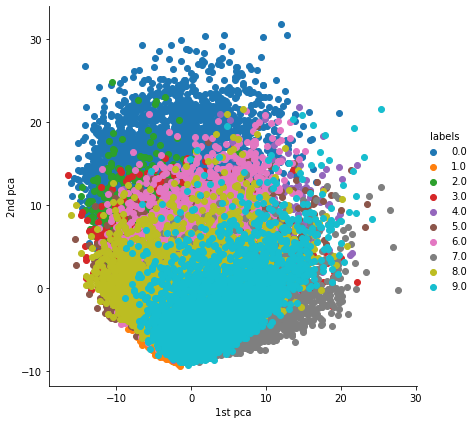

In [43]:
import seaborn as sns
sns.FacetGrid(data_frame,hue='labels',size=6).map(plt.scatter,'1st pca','2nd pca').add_legend()
plt.show()

## Method 2: Using Scikit-learn

In [44]:
from sklearn import decomposition
pca=decomposition.PCA()

In [51]:
pca.n_components=2
pca_data=pca.fit_transform(stand_data)

In [52]:
print("shape of pca_data =",pca_data.shape)

shape of pca_data = (42000, 2)


In [53]:
pca_data=np.vstack((pca_data.T,l)).T
data_frame=pd.DataFrame(data=pca_data,columns=("1st pca","2nd pca","labels"))
print(data_frame.head())

     1st pca   2nd pca  labels
0  -5.140519 -5.226294     1.0
1  19.292303  6.033877     0.0
2  -7.644461 -1.705921     1.0
3  -0.474253  5.836345     4.0
4  26.559587  6.025321     0.0


C:\Users\vingo\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


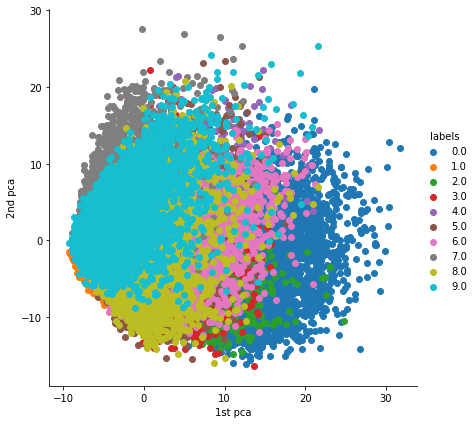

In [54]:
import seaborn as sns
sns.FacetGrid(data_frame,hue='labels',size=6).map(plt.scatter,'1st pca','2nd pca').add_legend()
plt.show()